In [1]:
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from igraph import *
import cairo
import pandas as pd

# 1. Networks in igraph

**igraph** is a collection of network analysis tools with the emphasis on efficiency, portability and ease of use. igraph is open source and free. igraph can be programmed in R, Python, Mathematica and C/C++. Lessons will cover the igraph python package but feel free to investigate on your own the R package. 

To install the package you just need to follow this instructions: https://igraph.org/python/doc/tutorial/install.html#installing-igraph-from-the-python-package-index


You have the doc for this package here: https://igraph.org/python/doc/api/igraph._igraph.GraphBase.html

# 1.1 Create networks

First let's install and load the package in order to start from an empty environment.

In [3]:
from igraph import *
import cairo
import pandas as pd

We can generate graphs using the graph function of igraph. It receives the following arguments:

* Edges (A vector defining the edges)
* n (The number of vertices in the graph)
* isolates (names of isolate vertices)
* directed (Whether to create a directed graph)
* simplify (whether to simplify the graph)

Let's start with the simplest one: an undirected graph with three edges.
Undirected graphs are for symmetric relationships.

In [4]:
g1 = Graph(edges=[[0,1], [1,2], [2,0]])

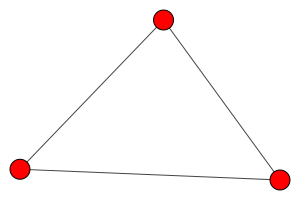

In [5]:
plot(g1,bbox=(300, 200))

You can obtain more information about the graph executing class and executing print(g1). 

The description of an igraph object starts with up to four letters:

1. D or U, for a directed or undirected graph: if either they have symmetrical or asymmetrical relations
2. N for a named graph (where nodes have a name attribute)
3. W for a weighted graph (where edges have a weight attribute): when each connection does not have the same importance
4. B for a bipartite (two-mode) graph (where nodes have a type attribute)

The two numbers that follow (7 5) refer to the number of nodes and edges in the graph. The description also lists node & edge attributes, for example:

* (g/c) - graph-level character attribute
* (v/c) - vertex-level character attribute
* (e/n) - edge-level numeric attribute

In [6]:
print(g1)

IGRAPH U--- 3 3 --
+ edges:
0--1 1--2 0--2


Now, do you think you can create a different graph?

In [ ]:
#Discussion board 1.1
# Create it, plot it and comment the type of the graph, number of nodes, edges...

You can create a graph with a representation of a graph formula.

A graph formula is a simple string representation of a graph. It is very handy for creating small graphs quickly. The string consists of vertex names separated by edge operators. An edge operator is a sequence of dashes (-) that may or may not start with an arrowhead (< at the beginning of the sequence or > at the end of the sequence). The edge operators can be arbitrarily long, i.e., you may use as many dashes to draw them as you like. This makes a total of four different edge operators:

----- makes an undirected edge

<---- makes a directed edge pointing from the vertex on the right hand side of the operator to the vertex on the left hand side
----> is the opposite of <----

<---> creates a mutual directed edge pair between the two vertices

If you only use the undirected edge operator (-----), the graph will be undirected. Otherwise it will be directed. Vertex names used in the formula will be assigned to the name vertex attribute of the graph

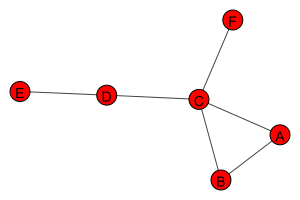

In [7]:
g4 = Graph.Formula('A-B, B-C, C-A, C-D, D-E, C-F')
plot(g4,bbox=(300, 200),vertex_label=g4.vs['name'])

In [8]:
print(g4)

IGRAPH UN-- 6 6 --
+ attr: name (v)
+ edges (vertex names):
A--B, A--C, B--C, C--D, C--F, D--E


In [ ]:
#Discussion board 1.2
# Create a new graph with the formula, plot it and comment the type of the graph, number of nodes, edges...

# 1.2 Edge, vertex, and network attributes

You can access vertices by getting the dataframe of vertices:

In [9]:
g4.get_vertex_dataframe()

,name
vertex ID,
0,A
1,B
2,C
3,D
4,E
5,F


And the edges by getting the dataframe of vertices:

In [10]:
g4.get_edgelist()

[(0, 1), (0, 2), (1, 2), (2, 3), (2, 5), (3, 4)]

To access the vertex/edge sequence we can use g.vs/g.es. g.vs and g.es are properties of the graph and can be used to get specific attributes of the graph. For example:

In [11]:
g4.vs['name']

['A', 'B', 'C', 'D', 'E', 'F']

An adjacency matrix A is a representation of the graph in which:
* Aij = 1 if there is a link from node i to node j
* Aij = 0 otherwise

You can access the network adjacency matrix directly doing:

In [12]:
g4.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0]])

And you can index that matrix by using the vertex name

In [13]:
g4["A","B"]

1

Attributes can be added to the network, vertices, or edges. 
With vertex_attributes and edge_attributes you can query the atributes of a given graph.

In this case we only have the vertex name (that is automatically generated when we created the network).

In [15]:
g4.vertex_attributes()

['name']

In [16]:
g4.edge_attributes()

[]

To set the attributes the following syntax can be used.

In [17]:
g4.vs['newAtt']="New attribute"
g4.get_vertex_dataframe()

,name,newAtt
vertex ID,,
0,A,New attribute
1,B,New attribute
2,C,New attribute
3,D,New attribute
4,E,New attribute
5,F,New attribute


Create your own attribute for vowels. This attribute must be boolean (True if it is a vowel).

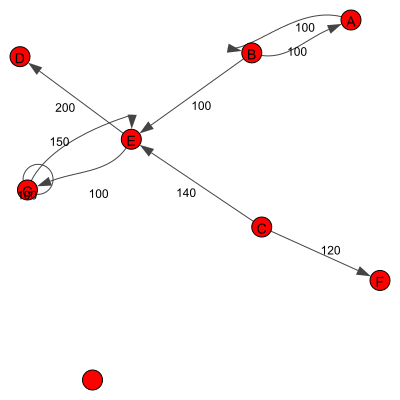

In [38]:
# Create a new graph with the formula, plot it and comment the type of the graph, number of nodes, edges...
# Create a graph with 7 vertices, one isolated vertix, and directed edges between them
g2 = Graph(directed=True, edges=[[0,1], [1,0], [1,4],[2,5], [6,4], [6,6], [4,3], [2,4], [4,6]], edge_attrs={"weight": [100, 100, 100, 120, 150, 100, 200, 140, 100]},
           n=7, vertex_attrs={"label": ["A", "B", "C", "D", "E", "F", "G"]})

g2.get_adjacency(attribute="weight")

g2.add_vertex(1)
plot(g2,bbox=(400, 400), vertex_label=g2.vs["label"], edge_label=g2.es["weight"])


In [39]:
#new attribute gor g2 if vertex is vowel or not
g2.vs["vowel"] = [1 if x in ["A","E","I","O","U"] else 0 for x in g2.vs["name"]]
g2.get_vertex_dataframe()



,label,name,vowel
vertex ID,,,
0,A,NaN,0
1,B,NaN,0
2,C,NaN,0
3,D,NaN,0
4,E,NaN,0
5,F,NaN,0
6,G,NaN,0
7,None,1.0,0


The color is also an attribute.

In [40]:
#new attribute gor g3 randomly filled with colours
import random

g2.vs["color"] = [random.choice(["red","green","blue"]) for x in g2.vs["name"]]
g2.get_vertex_dataframe()

,label,name,vowel,color
vertex ID,,,,
0,A,NaN,0,green
1,B,NaN,0,blue
2,C,NaN,0,green
3,D,NaN,0,red
4,E,NaN,0,green
5,F,NaN,0,red
6,G,NaN,0,red
7,None,1.0,0,green


Simple graphs are graphs which do not contain loop and multiple edges. The g.simplify() function does this for us. 

Create a graph g5 which contains loops and multiple edges and plot it. Then simplify it and plot it again.

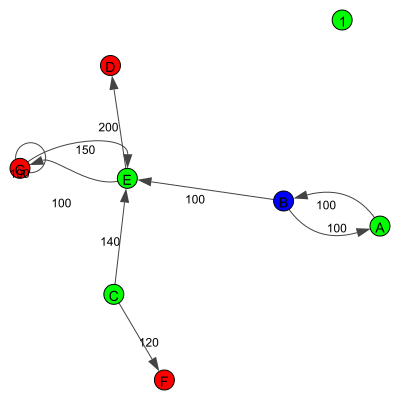

In [41]:
#before simplify
plot(g2,bbox=(400, 400), vertex_label=g2.vs["name"], edge_label=g2.es["weight"])

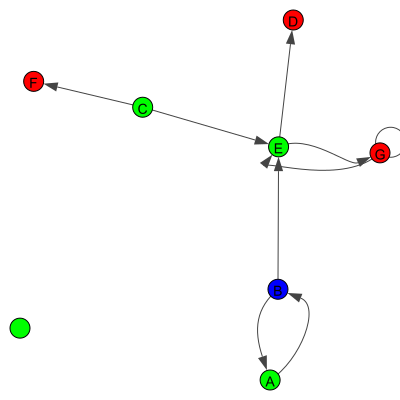

In [42]:
plot(g2,bbox=(400, 400))

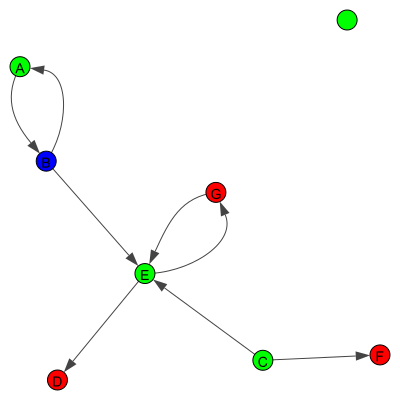

In [43]:
#simplify g2
g2.simplify()
plot(g2,bbox=(400, 400))

# 1.3 Specific graphs and graph models

There are some specific graphs that can be done with igraph functions:

* Full graph
* Simple star graph
* Tree graph
* Ring graph
* ...


You have an example here. Check what others you can find in the documentation: https://igraph.org/python/doc/tutorial/generation.html

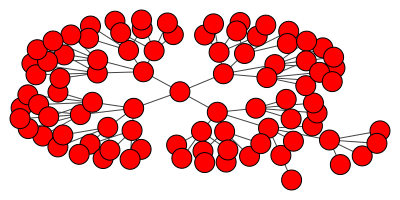

In [55]:
#create g8 gith 30 nodees using a complex star graph
g8 = Graph.Tree(90, 4)
plot(g8, bbox=(400, 200))

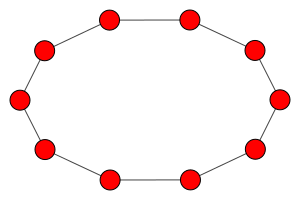

In [44]:
g7=Graph.Ring(10)
plot(g7, bbox=(300, 200))

To write a graph to a file we can use different functions regarding the format. Formats available: 
* write_dot	Writes the graph in DOT format to the given file.
* write_edgelist	Writes the edge list of a graph to a file.
* write_gml	Writes the graph in GML format to the given file.
* write_graphml	Writes the graph to a GraphML file.
* write_leda	Writes the graph to a file in LEDA native format.
* write_lgl	Writes the edge list of a graph to a file in .lgl format.
* write_ncol	Writes the edge list of a graph to a file in .ncol format.
* write_pajek	Writes the graph in Pajek format to the given file.

Change the path to the one you want to use.

In [57]:
#Change the path and use a different format. Check the format in you computer and share it in the 2_2 discussion board
g8.write_edgelist(r"C:\Users\pedro\github\social_media_analysis/edgelist.txt")

To read from a file, we can use the corresponding function. It supports several formats: 
* Read_DL	Reads an UCINET DL file and creates a graph based on it.
* Read_Edgelist	Reads an edge list from a file and creates a graph based on it.
* Read_GML	Reads a GML file and creates a graph based on it.
* Read_GraphDB	Reads a GraphDB format file and creates a graph based on it.
* Read_GraphML	Reads a GraphML format file and creates a graph based on it.
* Read_Lgl	Reads an .lgl file used by LGL.
* Read_Ncol	Reads an .ncol file used by LGL.
* Read_Pajek	Reads a Pajek format file and creates a graph based on it.

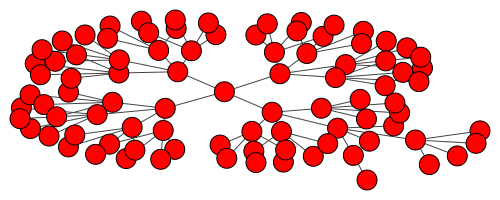

In [58]:
#Change the path
g8=Graph.Read_Edgelist(r"C:\Users\pedro\github\social_media_analysis/edgelist.txt", directed=False)
plot(g8, bbox=(500, 200))